In [1]:
import pandas as pd

In [2]:
%pwd

'/Users/adekunleajibode/Paper_1/RQ3'

In [3]:
data1 = "/Users/adekunleajibode/paper_1_routh_code/major_using_readme.csv"
data2 = "/Users/adekunleajibode/paper_1_routh_code/major_using_modelcard.csv"
data3 = "/Users/adekunleajibode/paper_1_routh_code/major_using_config.csv"

modelcard = pd.read_csv(data2)
readme = pd.read_csv(data1)
config = pd.read_csv(data3)

In [4]:
modelcard['modelcard_abstract'] = modelcard['modelcard_abstract'].str.split(',\n')


card_exploded = modelcard.explode('modelcard_abstract')
card_exploded

,Owner,main_model_name,to_compare,modelcard_abstract
0,Ahmed007,Ahmed007/Copilot_for_poors_v2,Ahmed007/Copilot_for_poors,training parameters increase
0,Ahmed007,Ahmed007/Copilot_for_poors_v2,Ahmed007/Copilot_for_poors,performance improvement
1,albert,albert/albert-xlarge-v1,albert/albert-xlarge-v2,performance improvement
2,alpcansoydas,alpcansoydas/bert-base-arabic-emotion-analysis-v2,alpcansoydas/bert-base-arabic-emotion-analysis,performance improvement
2,alpcansoydas,alpcansoydas/bert-base-arabic-emotion-analysis-v2,alpcansoydas/bert-base-arabic-emotion-analysis,dataset version increase
...,...,...,...,...
68,T-Systems-onsite,T-Systems-onsite/mt5-small-sum-de-en-v2,deutsche-telekom/mt5-small-sum-de-en-v1,train bash size increase
68,T-Systems-onsite,T-Systems-onsite/mt5-small-sum-de-en-v2,deutsche-telekom/mt5-small-sum-de-en-v1,epoch decrease
68,T-Systems-onsite,T-Systems-onsite/mt5-small-sum-de-en-v2,deutsche-telekom/mt5-small-sum-de-en-v1,transformer version increase
69,tartuNLP,tartuNLP/EstBERT_NER_v2,tartuNLP/EstBERT_NER,result inclusion


In [5]:
card_exploded.to_csv("exploded_card.csv",index = None)

In [6]:
import pandas as pd
import string

# Categories dictionary with lowercase items
categories = {
    "configuration changes": ["hyperperameter release" ,"hyperparameters updated", "hidden size derease", "train bash size increase", "evaluation batch size decrease", "train batch size decrease", "training result improvement", "evaluation batchsize increase", "hyper perameter release","training parameters increase","training batchsize increase", "evaluation batch size increase", "transformer version increase", "dataset version increase", "tokenizer version increase", "validation metrics increase", "normalized layer addition", "merged method change", "embedding size reduction", "hyperparameters decrease", "hyperparameter release", "epoch increase", "hidden size decrease", "layer size decrease", "token size decrease", "hyperparameters updated", "epoch decrease", "train batch size increase"],
    "model architecture": ["different merged base model", "basemodel change", "multiple merge basemodel", "merge basemodel increase", "different trained variant", "merge basemodel decrease", "trained variant change"],
    "performance changes": ["precission improvement", "performance improvement", "performance decrease", "performance deteriorate", "basemodel comparison changed", "precision improvement"],
    "other changes": ["file format change", "version deprecated"],
    "no changes": ["no traces of changes", "no traces of change"],
    "dataset": ["modelcard empty", "modelcard deletion", "no modelcard", "modelcard addition", "dataset change", "instruction dataset increase", "dataset version increase", "dataset version decrease", "dataset increase"],
    "training library changes": ["tokenizer version increase", "tokenizer version decrease", "transformer version increase", "transformer version decrease"],
    "energy consumption": ["CO2 emission decreased"],
    "license": ["license inclusion", "result inclusion,", "result inclusion"]
}

def preprocess_abstract(abstract):
    # Remove leading and trailing whitespace and punctuation
    abstract = abstract.strip(string.punctuation + string.whitespace)
    return abstract.lower()

# Function to assign category based on 'modelcard_abstract' column
def assign_category(row):
    matched_category = None
    abstract = preprocess_abstract(row['modelcard_abstract'])
    for category, items in categories.items():
        if abstract in [preprocess_abstract(x) for x in items]:
            matched_category = category
            break  # Exit the loop if a match is found

    if matched_category:
        return matched_category
    else:
        print(f"{row['modelcard_abstract']}")
        return "Unknown"


# Apply function with debugging
card_exploded['category'] = card_exploded.apply(assign_category, axis=1)
card_exploded


,Owner,main_model_name,to_compare,modelcard_abstract,category
0,Ahmed007,Ahmed007/Copilot_for_poors_v2,Ahmed007/Copilot_for_poors,training parameters increase,configuration changes
0,Ahmed007,Ahmed007/Copilot_for_poors_v2,Ahmed007/Copilot_for_poors,performance improvement,performance changes
1,albert,albert/albert-xlarge-v1,albert/albert-xlarge-v2,performance improvement,performance changes
2,alpcansoydas,alpcansoydas/bert-base-arabic-emotion-analysis-v2,alpcansoydas/bert-base-arabic-emotion-analysis,performance improvement,performance changes
2,alpcansoydas,alpcansoydas/bert-base-arabic-emotion-analysis-v2,alpcansoydas/bert-base-arabic-emotion-analysis,dataset version increase,configuration changes
...,...,...,...,...,...
68,T-Systems-onsite,T-Systems-onsite/mt5-small-sum-de-en-v2,deutsche-telekom/mt5-small-sum-de-en-v1,train bash size increase,configuration changes
68,T-Systems-onsite,T-Systems-onsite/mt5-small-sum-de-en-v2,deutsche-telekom/mt5-small-sum-de-en-v1,epoch decrease,configuration changes
68,T-Systems-onsite,T-Systems-onsite/mt5-small-sum-de-en-v2,deutsche-telekom/mt5-small-sum-de-en-v1,transformer version increase,configuration changes
69,tartuNLP,tartuNLP/EstBERT_NER_v2,tartuNLP/EstBERT_NER,result inclusion,license


In [7]:
total_cat = card_exploded.groupby("category")['Owner'].size()
total_cat

category
configuration changes       36
dataset                     31
energy consumption           1
license                      2
model architecture           7
no changes                  13
other changes                2
performance changes         16
training library changes     4
Name: Owner, dtype: int64

In [8]:
readme['readme'] = readme['readme'].str.split(',\n')


readme_exploded = readme.explode('readme')
readme_exploded

,Owner,main_model_name,to_compare,readme
0,Ahmed007,Ahmed007/Copilot_for_poors_v2,Ahmed007/Copilot_for_poors,model name changed
1,albert,albert/albert-xlarge-v1,albert/albert-xlarge-v2,Nothing changed
2,alpcansoydas,alpcansoydas/bert-base-arabic-emotion-analysis-v2,alpcansoydas/bert-base-arabic-emotion-analysis,model name changed
3,AmelieSchreiber,AmelieSchreiber/esm2_t6_8M_general_binding_sit...,AmelieSchreiber/esm2_t6_8M_general_binding_sites,widget text inclusion
3,AmelieSchreiber,AmelieSchreiber/esm2_t6_8M_general_binding_sit...,AmelieSchreiber/esm2_t6_8M_general_binding_sites,dataset inclusion
...,...,...,...,...
65,stabilityai,stabilityai/stablelm-base-alpha-3b-v2,stabilityai/stablelm-base-alpha-3b,dataset inclusion
66,surprisedPikachu007,surprisedPikachu007/search_summarize_v1,surprisedPikachu007/mt5-small-search-summarizer,readme inclusion
67,Swarnava,Swarnava/T5_base_title_v2,Swarnava/T5_base_title,model name changed
68,T-Systems-onsite,T-Systems-onsite/mt5-small-sum-de-en-v2,deutsche-telekom/mt5-small-sum-de-en-v1,dataset decreased


In [9]:
readme_exploded



,Owner,main_model_name,to_compare,readme
0,Ahmed007,Ahmed007/Copilot_for_poors_v2,Ahmed007/Copilot_for_poors,model name changed
1,albert,albert/albert-xlarge-v1,albert/albert-xlarge-v2,Nothing changed
2,alpcansoydas,alpcansoydas/bert-base-arabic-emotion-analysis-v2,alpcansoydas/bert-base-arabic-emotion-analysis,model name changed
3,AmelieSchreiber,AmelieSchreiber/esm2_t6_8M_general_binding_sit...,AmelieSchreiber/esm2_t6_8M_general_binding_sites,widget text inclusion
3,AmelieSchreiber,AmelieSchreiber/esm2_t6_8M_general_binding_sit...,AmelieSchreiber/esm2_t6_8M_general_binding_sites,dataset inclusion
...,...,...,...,...
65,stabilityai,stabilityai/stablelm-base-alpha-3b-v2,stabilityai/stablelm-base-alpha-3b,dataset inclusion
66,surprisedPikachu007,surprisedPikachu007/search_summarize_v1,surprisedPikachu007/mt5-small-search-summarizer,readme inclusion
67,Swarnava,Swarnava/T5_base_title_v2,Swarnava/T5_base_title,model name changed
68,T-Systems-onsite,T-Systems-onsite/mt5-small-sum-de-en-v2,deutsche-telekom/mt5-small-sum-de-en-v1,dataset decreased


In [10]:
readme_exploded.to_csv("exploded_readme.csv",index = None)

In [11]:
import pandas as pd
import string

# Categories dictionary with lowercase items
categories = {
    "model architecture": ["merged base model changed", "base model changed"],
    "performance changes": ["performance update", "performance increment", "result inclusion", "result changed"],
    "license": ["license inclusion", "license changed"],
    "dataset": ["dataset inclusion", "dataset name changed", "dataset removal", "dataset increased", "dataset decreased"],
    "performance metrics changes": ["metrics inclusion", "metrics indication", "metrics removed"],
    "training library changes": ["library used inclusion", "used library inclusion", "transformer inclusion"],
    "others": ["pipeline inclusion", "task indication", "tags inclusion", "task inclusion", "model name changed", "language inclusion", "language removal"],
    "energy consumption": ["CO2 emission decreased", "C02 emission increased"],
    "no changes": ["Nothing changed", "widget text inclusion", "readme inclusion", "readme deletion", "no readme"]
}

def preprocess_abstract(abstract):
    # Remove leading and trailing whitespace and punctuation
    abstract = abstract.strip(string.punctuation + string.whitespace)
    return abstract.lower()

# Function to assign category based on 'modelcard_abstract' column
def assign_category(row):
    matched_category = None
    abstract = preprocess_abstract(row['readme'])
    for category, items in categories.items():
        if abstract in [preprocess_abstract(x) for x in items]:
            matched_category = category
            break  # Exit the loop if a match is found

    if matched_category:
        return matched_category
    else:
        print(f"{row['readme']}")
        return "Unknown"


# Apply function with debugging
readme_exploded['category'] = readme_exploded.apply(assign_category, axis=1)
readme_exploded

,Owner,main_model_name,to_compare,readme,category
0,Ahmed007,Ahmed007/Copilot_for_poors_v2,Ahmed007/Copilot_for_poors,model name changed,others
1,albert,albert/albert-xlarge-v1,albert/albert-xlarge-v2,Nothing changed,no changes
2,alpcansoydas,alpcansoydas/bert-base-arabic-emotion-analysis-v2,alpcansoydas/bert-base-arabic-emotion-analysis,model name changed,others
3,AmelieSchreiber,AmelieSchreiber/esm2_t6_8M_general_binding_sit...,AmelieSchreiber/esm2_t6_8M_general_binding_sites,widget text inclusion,no changes
3,AmelieSchreiber,AmelieSchreiber/esm2_t6_8M_general_binding_sit...,AmelieSchreiber/esm2_t6_8M_general_binding_sites,dataset inclusion,dataset
...,...,...,...,...,...
65,stabilityai,stabilityai/stablelm-base-alpha-3b-v2,stabilityai/stablelm-base-alpha-3b,dataset inclusion,dataset
66,surprisedPikachu007,surprisedPikachu007/search_summarize_v1,surprisedPikachu007/mt5-small-search-summarizer,readme inclusion,no changes
67,Swarnava,Swarnava/T5_base_title_v2,Swarnava/T5_base_title,model name changed,others
68,T-Systems-onsite,T-Systems-onsite/mt5-small-sum-de-en-v2,deutsche-telekom/mt5-small-sum-de-en-v1,dataset decreased,dataset


In [12]:
readme_size = readme_exploded.groupby("category")["Owner"].size()
readme_size

category
dataset                         9
energy consumption              1
license                         3
model architecture              5
no changes                     40
others                         15
performance changes             4
performance metrics changes     4
training library changes        4
Name: Owner, dtype: int64

In [13]:
dat1 = "/Users/adekunleajibode/paper_1_routh_code/minor_lfs_card_diff_updated.csv"
dat2 = "/Users/adekunleajibode/paper_1_routh_code/minor_lfs_readme_statistics.csv"


card = pd.read_csv(dat1)
read = pd.read_csv(dat2)

In [14]:
card['changes_observed'] = card['changes_observed'].str.split(',\n')


minorcard_exploded = card.explode('changes_observed')
minorcard_exploded

,Owner,main_model_name,to_compare,largefile_changed,card_changed,replaced_words,first_card_text,second_card_text,changes_observed
0,922-CA,922-CA/LLilmonix3b-v0.3,922-CA/LLilmonix3b-v0.4a,1,1,Nothing change,* Trained on a dataset of ~600 items (dialogue...,* Experimental [Marx-3b-v2](https://huggingfac...,hyperparameters increased
1,AdityaXPV,AdityaXPV/llama-2-7b-law-sage-v0.2,AdityaXPV/llama-2-7b-law-sage-v0.1,1,1,Replaced '-- - library_name : transformers tag...,- **Funded by [optional]:** [More Information ...,NaN,card removed
2,Ahmed107,Ahmed107/nllb200-ar-en_v11.1,Ahmed107/nllb200-ar-en_v11,1,1,Nothing change,base_model: Ahmed107/nllb200-ar-en_v8\n<!-- Th...,base_model: facebook/nllb-200-distilled-600M\n...,card removed
3,alexredna,alexredna/Tukan-1.1B-Chat-v0.6,alexredna/Tukan-1.1B-Chat-v0.2,1,1,Nothing change,NaN,base_model: TinyLlama/TinyLlama-1.1B-Chat-v1.0...,card removed
4,arentz,arentz/spambutcher_mistral_7b-v0.2,arentz/spambutcher_mistral_7b-v0.1,1,1,Replaced '* * [ More Information Needed ] < ! ...,- **Funded by [optional]:** [More Information ...,The model was trained from Mistral-7B to ident...,no traces of change
5,ayeshgk,ayeshgk/codet5-small-ft-v10.1,ayeshgk/codet5-small-ft-v10,1,1,Nothing change,base_model: Salesforce/codet5-small\n<!-- This...,base_model: Salesforce/codet5-small\n<!-- This...,performance improvement
5,ayeshgk,ayeshgk/codet5-small-ft-v10.1,ayeshgk/codet5-small-ft-v10,1,1,Nothing change,base_model: Salesforce/codet5-small\n<!-- This...,base_model: Salesforce/codet5-small\n<!-- This...,Gen Length increased
5,ayeshgk,ayeshgk/codet5-small-ft-v10.1,ayeshgk/codet5-small-ft-v10,1,1,Nothing change,base_model: Salesforce/codet5-small\n<!-- This...,base_model: Salesforce/codet5-small\n<!-- This...,epoch increase
6,cookinai,cookinai/Blitz-v0.1,cookinai/Blitz-v0.2,1,1,"Replaced 'epochs , if this one turns out well'...",# Base finetune of [Mistral-7B-Instruct-v0.2](...,# Base finetune of [Mistral-7B-Instruct-v0.2](...,epoch increase
7,davzoku,davzoku/cria-llama2-7b-v1.3,davzoku/cria-llama2-7b-v1.2,1,1,Nothing change,pipeline_tag: text-generation\n💡 [Article](htt...,NaN,card inclusion


In [15]:
categories = {
    "configuration changes": ["Gen Length increased", "hyperperameter release", "hyperparameters increased", "hyperparameters updated", "hidden size derease", "train bash size increase", "evaluation batch size decrease", "train batch size decrease", "training result improvement", "evaluation batchsize increase", "hyper perameter release","training parameters increase","training batchsize increase", "evaluation batch size increase", "transformer version increase", "dataset version increase", "tokenizer version increase", "validation metrics increase", "normalized layer addition", "merged method change", "embedding size reduction", "hyperparameters decrease", "hyperparameter release", "epoch increase", "hidden size decrease", "layer size decrease", "token size decrease", "hyperparameters updated", "epoch decrease", "train batch size increase"],
    "performance changes": ["performance improvement", "performance increment"],
    "license": ["lincense inclusion", "license inclusion", "license changed", "license removed"],
    "model changes": ["training model increased", "merged basemodel increased", "finetuned variant changed", "finetuned variant inclusion", "basemodel changed", "basemodel inclusion", "basemodel updated"],
    "training library changes": ["transformer indication", "transformer updated"],
    "dataset": ["dataset increased", "dataset update"],
    "performance metrics changes": ["metrics inclusion"],
    "generation inference": ["generation inference updated"],
    "others": ["deprecated", "name changes", "language removed", "language updated", "language increased", "language removed", "pipeline tag removed", "version deprecated", "tag update"],
    "no changes": ["no traces of change", "no adequate information", "card information removed", "card inclusion", "card removed", "readme removed", "widget inclusion"]
}

def preprocess_abstract(abstract):
    # Remove leading and trailing whitespace and punctuation
    abstract = abstract.strip(string.punctuation + string.whitespace)
    return abstract.lower()

# Function to assign category based on 'modelcard_abstract' column
def assign_category(row):
    matched_category = None
    abstract = preprocess_abstract(row['changes_observed'])
    for category, items in categories.items():
        if abstract in [preprocess_abstract(x) for x in items]:
            matched_category = category
            break  # Exit the loop if a match is found

    if matched_category:
        return matched_category
    else:
        print(f"{row['changes_observed']}")
        return "Unknown"


# Apply function with debugging
minorcard_exploded['category'] = minorcard_exploded.apply(assign_category, axis=1)
minorcard_exploded

,Owner,main_model_name,to_compare,largefile_changed,card_changed,replaced_words,first_card_text,second_card_text,changes_observed,category
0,922-CA,922-CA/LLilmonix3b-v0.3,922-CA/LLilmonix3b-v0.4a,1,1,Nothing change,* Trained on a dataset of ~600 items (dialogue...,* Experimental [Marx-3b-v2](https://huggingfac...,hyperparameters increased,configuration changes
1,AdityaXPV,AdityaXPV/llama-2-7b-law-sage-v0.2,AdityaXPV/llama-2-7b-law-sage-v0.1,1,1,Replaced '-- - library_name : transformers tag...,- **Funded by [optional]:** [More Information ...,NaN,card removed,no changes
2,Ahmed107,Ahmed107/nllb200-ar-en_v11.1,Ahmed107/nllb200-ar-en_v11,1,1,Nothing change,base_model: Ahmed107/nllb200-ar-en_v8\n<!-- Th...,base_model: facebook/nllb-200-distilled-600M\n...,card removed,no changes
3,alexredna,alexredna/Tukan-1.1B-Chat-v0.6,alexredna/Tukan-1.1B-Chat-v0.2,1,1,Nothing change,NaN,base_model: TinyLlama/TinyLlama-1.1B-Chat-v1.0...,card removed,no changes
4,arentz,arentz/spambutcher_mistral_7b-v0.2,arentz/spambutcher_mistral_7b-v0.1,1,1,Replaced '* * [ More Information Needed ] < ! ...,- **Funded by [optional]:** [More Information ...,The model was trained from Mistral-7B to ident...,no traces of change,no changes
5,ayeshgk,ayeshgk/codet5-small-ft-v10.1,ayeshgk/codet5-small-ft-v10,1,1,Nothing change,base_model: Salesforce/codet5-small\n<!-- This...,base_model: Salesforce/codet5-small\n<!-- This...,performance improvement,performance changes
5,ayeshgk,ayeshgk/codet5-small-ft-v10.1,ayeshgk/codet5-small-ft-v10,1,1,Nothing change,base_model: Salesforce/codet5-small\n<!-- This...,base_model: Salesforce/codet5-small\n<!-- This...,Gen Length increased,configuration changes
5,ayeshgk,ayeshgk/codet5-small-ft-v10.1,ayeshgk/codet5-small-ft-v10,1,1,Nothing change,base_model: Salesforce/codet5-small\n<!-- This...,base_model: Salesforce/codet5-small\n<!-- This...,epoch increase,configuration changes
6,cookinai,cookinai/Blitz-v0.1,cookinai/Blitz-v0.2,1,1,"Replaced 'epochs , if this one turns out well'...",# Base finetune of [Mistral-7B-Instruct-v0.2](...,# Base finetune of [Mistral-7B-Instruct-v0.2](...,epoch increase,configuration changes
7,davzoku,davzoku/cria-llama2-7b-v1.3,davzoku/cria-llama2-7b-v1.2,1,1,Nothing change,pipeline_tag: text-generation\n💡 [Article](htt...,NaN,card inclusion,no changes


In [16]:
minorsize = minorcard_exploded.groupby("category")['Owner'].size()
print(len(minorcard_exploded))
minorsize

43


category
configuration changes     4
license                   2
model changes             5
no changes               30
others                    1
performance changes       1
Name: Owner, dtype: int64

In [17]:
read['changes_updated'] = read['changes_updated'].str.split(',\n')


minorread_exploded = read.explode('changes_updated')
minorread_exploded.to_csv('explodedminor.csv', index=None)

In [18]:
categories = {
    "configuration changes": ["generation inference updated", "Gen Length increased", "hyperperameter release", "hyperparameters increased", "hyperparameters updated", "hidden size derease", "train bash size increase", "evaluation batch size decrease", "train batch size decrease", "training result improvement", "evaluation batchsize increase", "hyper perameter release","training parameters increase","training batchsize increase", "evaluation batch size increase", "transformer version increase", "dataset version increase", "tokenizer version increase", "validation metrics increase", "normalized layer addition", "merged method change", "embedding size reduction", "hyperparameters decrease", "hyperparameter release", "epoch increase", "hidden size decrease", "layer size decrease", "token size decrease", "hyperparameters updated", "epoch decrease", "train batch size increase"],
    "performance changes": ["performance improvement", "performance increment"],
    "license": ["lincense inclusion", "license inclusion", "license changed", "license removed"],
    "model changes": ["basemodel updated", "training model increased", "merged basemodel increased", "finetuned variant changed", "finetuned variant inclusion", "basemodel changed", "basemodel inclusion", "basemodel updated"],
    "training library changes": ["transformer updated", "transformer indication", "transformer updated"],
    "dataset": ["dataset increased", "dataset update"],
    "performance metrics changes": ["metrics inclusion"],
    "generation inference": ["generation inference updated"],
    "others": ["pipelinetag removed", "language updated", "deprecated", "name changes", "language removed", "language updated", "language increased", "language removed", "pipeline tag removed", "version deprecated", "tag update"],
    "no changes": ["widget inclusion", "readme removed", "no traces of change", "no adequate information", "card information removed", "card inclusion", "card removed", "readme inclusion", "no readme", "readme inclusion"]
}

def preprocess_abstract(abstract):
    # Remove leading and trailing whitespace and punctuation
    abstract = abstract.strip(string.punctuation + string.whitespace)
    return abstract.lower()

# Function to assign category based on 'modelcard_abstract' column
def assign_category(row):
    matched_category = None
    abstract = preprocess_abstract(row['changes_updated'])
    for category, items in categories.items():
        if abstract in [preprocess_abstract(x) for x in items]:
            matched_category = category
            break  # Exit the loop if a match is found

    if matched_category:
        return matched_category
    else:
        print(f"{row['changes_updated']}")
        return "Unknown"
    
# Apply function with debugging
minorread_exploded['category'] = minorread_exploded.apply(assign_category, axis=1)
minorread_exploded

,Owner,main_model_name,to_compare,largefile_changed,readme_changed,changes,changes_updated,category
0,922-CA,922-CA/LLilmonix3b-v0.3,922-CA/LLilmonix3b-v0.4a,1,1,no traces of change,no traces of change,no changes
1,AdityaXPV,AdityaXPV/llama-2-7b-law-sage-v0.2,AdityaXPV/llama-2-7b-law-sage-v0.1,1,1,successor readme-inclusion,readme inclusion,no changes
2,adonlee,adonlee/LLaMA_2_13B_SFT_v1.5,adonlee/LLaMA_2_13B_SFT_v1,1,1,no traces of change,no traces of change,no changes
3,Ahmed107,Ahmed107/nllb200-ar-en_v11.1,Ahmed107/nllb200-ar-en_v11,1,1,successor basemodel-changed,basemodel changed,model changes
4,alexredna,alexredna/Tukan-1.1B-Chat-v0.6,alexredna/Tukan-1.1B-Chat-v0.2,1,1,successor readme-removed,readme removed,no changes
5,arentz,arentz/spambutcher_mistral_7b-v0.2,arentz/spambutcher_mistral_7b-v0.1,1,1,successor transformer-indication,transformer indication,training library changes
6,ayeshgk,ayeshgk/codet5-small-ft-v10.1,ayeshgk/codet5-small-ft-v10,1,1,successor name-changes,name changes,others
7,cookinai,cookinai/Blitz-v0.1,cookinai/Blitz-v0.2,1,1,successor transformer-indication,transformer indication,training library changes
8,davzoku,davzoku/cria-llama2-7b-v1.3,davzoku/cria-llama2-7b-v1.2,1,1,successor readme-inclusion,readme inclusion,no changes
9,Deepnoid,Deepnoid/deep-solar-v3.0,Deepnoid/deep-solar-Rev-v3.0.4,1,1,no traces of change,no traces of change,no changes


In [19]:
minorreadsize = minorread_exploded.groupby("category")['Owner'].size()
print(len(minorread_exploded))
minorreadsize

51


category
configuration changes           1
dataset                         3
license                         6
model changes                   3
no changes                     25
others                          9
performance metrics changes     1
training library changes        3
Name: Owner, dtype: int64

In [20]:
config['configfile'] = config['configfile'].str.strip(',')

config

,Owner,main_model_name,to_compare,configfile
0,Ahmed007,Ahmed007/Copilot_for_poors_v2,Ahmed007/Copilot_for_poors,modelpath
1,albert,albert/albert-xlarge-v1,albert/albert-xlarge-v2,"attention-probs-dropout-prob, hidden-act, hidd..."
2,alpcansoydas,alpcansoydas/bert-base-arabic-emotion-analysis-v2,alpcansoydas/bert-base-arabic-emotion-analysis,transformers-version
3,AmelieSchreiber,AmelieSchreiber/esm2_t6_8M_general_binding_sit...,AmelieSchreiber/esm2_t6_8M_general_binding_sites,no-changes
4,ankhamun,ankhamun/x_x-v0,ankhamun/xxxI0v_v0Ixxx,"modelpath, sliding-window, transformers-versio..."
...,...,...,...,...
65,stabilityai,stabilityai/stablelm-base-alpha-3b-v2,stabilityai/stablelm-base-alpha-3b,"architectures, auto-map, hidden-act, hidden-si..."
66,surprisedPikachu007,surprisedPikachu007/search_summarize_v1,surprisedPikachu007/mt5-small-search-summarizer,"modelpath, architectures, d-ff, dense-act-fn, ..."
67,Swarnava,Swarnava/T5_base_title_v2,Swarnava/T5_base_title,no-changes
68,T-Systems-onsite,T-Systems-onsite/mt5-small-sum-de-en-v2,deutsche-telekom/mt5-small-sum-de-en-v1,"torch-dtype, transformers-version"


In [21]:
new_rows = []

# Iterate through each row
for index, row in config.iterrows():
    # Split the 'configfile' value based on comma (',')
    config_files = row['configfile'].split(', ')
    
    # Create a new row for each config file
    for config_file in config_files:
        # Create a copy of the original row
        new_row = row.copy()
        
        # Update the 'configfile' value with the separated config file
        new_row['configfile'] = config_file
        
        # Append the new row to the list
        new_rows.append(new_row)

# Create a new DataFrame from the list of new rows
new_df = pd.DataFrame(new_rows)

# Display the new DataFrame
new_df.to_csv("exploded_config.csv", index=False)

In [22]:
import pandas as pd

# Data
data = {
    "Versions": ["Major", "Minor"],
    "Configuration": [36, 5],
    "Model Architecture": [12, 8],
    "License": [5, 8],
    "Performance": [20, 1],
    "Dataset": [40, 3],
    "Training Library": [8, 3],
    "Energy consumption": [2, 0],
    "Performance metrics": [4, 1],
    "Other Changes": [17, 10]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set "Versions" as index
df.set_index("Versions", inplace=True)

df

,Configuration,Model Architecture,License,Performance,Dataset,Training Library,Energy consumption,Performance metrics,Other Changes
Versions,,,,,,,,,
Major,36,12,5,20,40,8,2,4,17
Minor,5,8,8,1,3,3,0,1,10


In [23]:
import pandas as pd
from scipy.stats import fisher_exact
import numpy as np

# Data
data = {
    "Versions": ["Major", "Minor"],
    "Configuration": [36, 5],
    "Model Architecture": [12, 8],
    "License": [5, 8],
    "Performance": [20, 1],
    "Dataset": [40, 3],
    "Training Library": [8, 3],
    "Energy consumption": [2, 0],
    "Performance metrics": [4, 1],
    "Other Changes": [17, 10]
}


# Create DataFrame
df = pd.DataFrame(data)
df.set_index("Versions", inplace=True)

# Function to create a 2x2 table
def create_2x2_table(major_count, minor_count, total_major, total_minor):
    return [[major_count, total_major - major_count],
            [minor_count, total_minor - minor_count]]

# Total counts for each version
total_major = df.loc["Major"].sum()
total_minor = df.loc["Minor"].sum()

# Perform Fisher's Exact Test for each category
results = {}
for column in df.columns:
    table = create_2x2_table(df.at["Major", column], df.at["Minor", column], total_major, total_minor)
    print(table)
    odds_ratio, p_value = fisher_exact(table, alternative='two-sided')
    adjusted_p_value = p_value/9
    results[column] = {'Odds Ratio': odds_ratio, 'p-value': p_value, 'adjusted_p_value' : p_value/7}
    

# Print results
for category, result in results.items():
    print(f"{category}:")
    print(f"  Odds Ratio: {result['Odds Ratio']}")
    print(f"  p-value: {result['p-value']}")
    print(f"  Adjusted_p-value: {result['adjusted_p_value']}")
    print()


[[36, 108], [5, 34]]
[[12, 132], [8, 31]]
[[5, 139], [8, 31]]
[[20, 124], [1, 38]]
[[40, 104], [3, 36]]
[[8, 136], [3, 36]]
[[2, 142], [0, 39]]
[[4, 140], [1, 38]]
[[17, 127], [10, 29]]
Configuration:
  Odds Ratio: 2.2666666666666666
  p-value: 0.13113536625961575
  Adjusted_p-value: 0.01873362375137368

Model Architecture:
  Odds Ratio: 0.3522727272727273
  p-value: 0.042161700986041384
  Adjusted_p-value: 0.006023100140863055

License:
  Odds Ratio: 0.1393884892086331
  p-value: 0.0012523682517718202
  Adjusted_p-value: 0.00017890975025311716

Performance:
  Odds Ratio: 6.129032258064516
  p-value: 0.05055964379388273
  Adjusted_p-value: 0.007222806256268962

Dataset:
  Odds Ratio: 4.615384615384615
  p-value: 0.009605352283235832
  Adjusted_p-value: 0.0013721931833194044

Training Library:
  Odds Ratio: 0.7058823529411765
  p-value: 0.70363128826781
  Adjusted_p-value: 0.10051875546682999

Energy consumption:
  Odds Ratio: inf
  p-value: 1.0
  Adjusted_p-value: 0.14285714285714285



In [24]:
#Main

from statsmodels.stats.multitest import multipletests  # Import for correction
from scipy.stats import fisher_exact
import pandas as pd
import numpy as np

# Data
data = {
    "Versions": ["Major", "Minor"],
    "Configuration": [36, 5],
    "Model Architecture": [12, 8],
    "License": [5, 8],
    "Performance": [20, 1],
    "Dataset": [40, 3],
    "Training Library": [8, 3],
    "Energy consumption": [2, 0],
    "Performance metrics": [4, 1],
    "Other Changes": [17, 10]
}



# Create DataFrame
df = pd.DataFrame(data)
df.set_index("Versions", inplace=True)

# Function to create a 2x2 table
def create_2x2_table(major_count, minor_count, total_major, total_minor):
    return [[major_count, total_major - major_count],
            [minor_count, total_minor - minor_count]]

# Total counts for each version
total_major = df.loc["Major"].sum()
total_minor = df.loc["Minor"].sum()

# Perform Fisher's Exact Test for each category
results = {}
p_values = []
for column in df.columns:
    table = create_2x2_table(df.at["Major", column], df.at["Minor", column], total_major, total_minor)
    # Perform Fisher's exact test
    odds_ratio, p_value = fisher_exact(table, alternative='two-sided')
    p_values.append(p_value)
    results[column] = {'Odds Ratio': odds_ratio, 'p-value': p_value}

# Apply Bonferroni correction
rejected, adjusted_pvalues, _, _ = multipletests(p_values, method='bonferroni')

# Print results with adjusted p-values
for category, result, adjusted_p in zip(results.keys(), results.values(), adjusted_pvalues):
    print(f"{category}:")
    print(f"  Odds Ratio: {result['Odds Ratio']}")
    print(f"  p-value: {result['p-value']}")
    print(f"  Adjusted_p-value (Bonferroni): {adjusted_p}")
    print()


Configuration:
  Odds Ratio: 2.2666666666666666
  p-value: 0.13113536625961575
  Adjusted_p-value (Bonferroni): 1.0

Model Architecture:
  Odds Ratio: 0.3522727272727273
  p-value: 0.042161700986041384
  Adjusted_p-value (Bonferroni): 0.37945530887437245

License:
  Odds Ratio: 0.1393884892086331
  p-value: 0.0012523682517718202
  Adjusted_p-value (Bonferroni): 0.011271314265946382

Performance:
  Odds Ratio: 6.129032258064516
  p-value: 0.05055964379388273
  Adjusted_p-value (Bonferroni): 0.4550367941449446

Dataset:
  Odds Ratio: 4.615384615384615
  p-value: 0.009605352283235832
  Adjusted_p-value (Bonferroni): 0.08644817054912249

Training Library:
  Odds Ratio: 0.7058823529411765
  p-value: 0.70363128826781
  Adjusted_p-value (Bonferroni): 1.0

Energy consumption:
  Odds Ratio: inf
  p-value: 1.0
  Adjusted_p-value (Bonferroni): 1.0

Performance metrics:
  Odds Ratio: 1.0857142857142856
  p-value: 1.0
  Adjusted_p-value (Bonferroni): 1.0

Other Changes:
  Odds Ratio: 0.388188976377

In [25]:
othersminorread = minorread_exploded[minorread_exploded['category'] == 'others']
othersminorcard = minorcard_exploded[minorcard_exploded['category'] == 'others']
othermajorread = readme_exploded[readme_exploded['category'] == 'others']
othermajorcard = card_exploded[card_exploded['category'] == 'other changes']

In [26]:
minor_read_group =  othersminorread.groupby("changes_updated")['Owner'].size()
minor_card_group = othersminorcard.groupby('changes_observed')['Owner'].size()
major_read_group = othermajorread.groupby('readme')['Owner'].size()
major_card_group = othermajorcard.groupby('modelcard_abstract')['Owner'].size()

print("Minor Readme", minor_read_group)
print()
print("Minor Model Card",minor_card_group)
print()
print("Major Readme",major_read_group)
print()
print("Major Readme",major_card_group)


Minor Readme changes_updated
 deprecated             1
 language increased     1
 language removed       2
 language updated       2
 name changes           1
 pipelinetag removed    1
 tag update             1
Name: Owner, dtype: int64

Minor Model Card changes_observed
 deprecated    1
Name: Owner, dtype: int64

Major Readme readme
 language inclusion    4
 tags inclusion,       1
 task indication       1
language removal       1
model name changed     6
pipeline inclusion     1
task inclusion         1
Name: Owner, dtype: int64

Major Readme modelcard_abstract
 file format change    1
 version deprecated    1
Name: Owner, dtype: int64


In [27]:
othersminorread = minorread_exploded[minorread_exploded['category'] == 'others']
othersminorcard = minorcard_exploded[minorcard_exploded['category'] == 'others']
othermajorread = readme_exploded[readme_exploded['category'] == 'others']
othermajorcard = card_exploded[card_exploded['category'] == 'other changes']

In [28]:
minorread_exploded.to_csv("minor_readme.csv", index=False)
minorcard_exploded.to_csv("minor_card.csv", index=False)
readme_exploded.to_csv("major_readme.csv", index=False)
card_exploded.to_csv("major_card.csv", index=False)

In [29]:
card_exploded["Configuration Changes"] = card_exploded.apply(lambda x: 1 if x["category"] == "configuration changes" else 0, axis=1)
card_exploded["Model Architecture Changes"] = card_exploded.apply(lambda x: 1 if x["category"] == "model architecture" else 0, axis=1)
card_exploded["License Changes"] = card_exploded.apply(lambda x: 1 if x["category"] == "license" else 0, axis=1)
card_exploded["Performance Changes"] = card_exploded.apply(lambda x: 1 if x["category"] == "performance changes" else 0, axis=1)
card_exploded["Dataset Changes"] = card_exploded.apply(lambda x: 1 if x["category"] == "dataset" else 0, axis=1)
card_exploded["Training Library Changes"] = card_exploded.apply(lambda x: 1 if x["category"] == "training library changes" else 0, axis=1)
card_exploded["Energy Consumption Changes"] = card_exploded.apply(lambda x: 1 if x["category"] == "energy consumption" else 0, axis=1)
card_exploded["Evaluation Metrics Changes"] = card_exploded.apply(lambda x: 1 if x["category"] == "performance metrics changes" else 0, axis=1)
card_exploded["Other Changes"] = card_exploded.apply(lambda x: 1 if x["category"] == "other changes" else 0, axis=1)

In [30]:
card_exploded

,Owner,main_model_name,to_compare,modelcard_abstract,category,Configuration Changes,Model Architecture Changes,License Changes,Performance Changes,Dataset Changes,Training Library Changes,Energy Consumption Changes,Evaluation Metrics Changes,Other Changes
0,Ahmed007,Ahmed007/Copilot_for_poors_v2,Ahmed007/Copilot_for_poors,training parameters increase,configuration changes,1,0,0,0,0,0,0,0,0
0,Ahmed007,Ahmed007/Copilot_for_poors_v2,Ahmed007/Copilot_for_poors,performance improvement,performance changes,0,0,0,1,0,0,0,0,0
1,albert,albert/albert-xlarge-v1,albert/albert-xlarge-v2,performance improvement,performance changes,0,0,0,1,0,0,0,0,0
2,alpcansoydas,alpcansoydas/bert-base-arabic-emotion-analysis-v2,alpcansoydas/bert-base-arabic-emotion-analysis,performance improvement,performance changes,0,0,0,1,0,0,0,0,0
2,alpcansoydas,alpcansoydas/bert-base-arabic-emotion-analysis-v2,alpcansoydas/bert-base-arabic-emotion-analysis,dataset version increase,configuration changes,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,T-Systems-onsite,T-Systems-onsite/mt5-small-sum-de-en-v2,deutsche-telekom/mt5-small-sum-de-en-v1,train bash size increase,configuration changes,1,0,0,0,0,0,0,0,0
68,T-Systems-onsite,T-Systems-onsite/mt5-small-sum-de-en-v2,deutsche-telekom/mt5-small-sum-de-en-v1,epoch decrease,configuration changes,1,0,0,0,0,0,0,0,0
68,T-Systems-onsite,T-Systems-onsite/mt5-small-sum-de-en-v2,deutsche-telekom/mt5-small-sum-de-en-v1,transformer version increase,configuration changes,1,0,0,0,0,0,0,0,0
69,tartuNLP,tartuNLP/EstBERT_NER_v2,tartuNLP/EstBERT_NER,result inclusion,license,0,0,1,0,0,0,0,0,0


In [31]:
readme_exploded["Configuration Changes"] = readme_exploded.apply(lambda x: 1 if x["category"] == "configuration changes" else 0, axis=1)
readme_exploded["Model Architecture Changes"] = readme_exploded.apply(lambda x: 1 if x["category"] == "model architecture" else 0, axis=1)
readme_exploded["License Changes"] = readme_exploded.apply(lambda x: 1 if x["category"] == "license" else 0, axis=1)
readme_exploded["Performance Changes"] = readme_exploded.apply(lambda x: 1 if x["category"] == "performance changes" else 0, axis=1)
readme_exploded["Dataset Changes"] = readme_exploded.apply(lambda x: 1 if x["category"] == "dataset" else 0, axis=1)
readme_exploded["Training Library Changes"] = readme_exploded.apply(lambda x: 1 if x["category"] == "training library changes" else 0, axis=1)
readme_exploded["Energy Consumption Changes"] = readme_exploded.apply(lambda x: 1 if x["category"] == "energy consumption" else 0, axis=1)
readme_exploded["Evaluation Metrics Changes"] = readme_exploded.apply(lambda x: 1 if x["category"] == "performance metrics changes" else 0, axis=1)
readme_exploded["Other Changes"] = readme_exploded.apply(lambda x: 1 if x["category"] == "other changes" else 0, axis=1)

In [32]:
readme_exploded

,Owner,main_model_name,to_compare,readme,category,Configuration Changes,Model Architecture Changes,License Changes,Performance Changes,Dataset Changes,Training Library Changes,Energy Consumption Changes,Evaluation Metrics Changes,Other Changes
0,Ahmed007,Ahmed007/Copilot_for_poors_v2,Ahmed007/Copilot_for_poors,model name changed,others,0,0,0,0,0,0,0,0,0
1,albert,albert/albert-xlarge-v1,albert/albert-xlarge-v2,Nothing changed,no changes,0,0,0,0,0,0,0,0,0
2,alpcansoydas,alpcansoydas/bert-base-arabic-emotion-analysis-v2,alpcansoydas/bert-base-arabic-emotion-analysis,model name changed,others,0,0,0,0,0,0,0,0,0
3,AmelieSchreiber,AmelieSchreiber/esm2_t6_8M_general_binding_sit...,AmelieSchreiber/esm2_t6_8M_general_binding_sites,widget text inclusion,no changes,0,0,0,0,0,0,0,0,0
3,AmelieSchreiber,AmelieSchreiber/esm2_t6_8M_general_binding_sit...,AmelieSchreiber/esm2_t6_8M_general_binding_sites,dataset inclusion,dataset,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,stabilityai,stabilityai/stablelm-base-alpha-3b-v2,stabilityai/stablelm-base-alpha-3b,dataset inclusion,dataset,0,0,0,0,1,0,0,0,0
66,surprisedPikachu007,surprisedPikachu007/search_summarize_v1,surprisedPikachu007/mt5-small-search-summarizer,readme inclusion,no changes,0,0,0,0,0,0,0,0,0
67,Swarnava,Swarnava/T5_base_title_v2,Swarnava/T5_base_title,model name changed,others,0,0,0,0,0,0,0,0,0
68,T-Systems-onsite,T-Systems-onsite/mt5-small-sum-de-en-v2,deutsche-telekom/mt5-small-sum-de-en-v1,dataset decreased,dataset,0,0,0,0,1,0,0,0,0


In [33]:
minorcard_exploded["Configuration Changes"] = minorcard_exploded.apply(lambda x: 1 if x["category"] == "configuration changes" else 0, axis=1)
minorcard_exploded["Model Architecture Changes"] = minorcard_exploded.apply(lambda x: 1 if x["category"] == "model architecture" else 0, axis=1)
minorcard_exploded["License Changes"] = minorcard_exploded.apply(lambda x: 1 if x["category"] == "license" else 0, axis=1)
minorcard_exploded["Performance Changes"] = minorcard_exploded.apply(lambda x: 1 if x["category"] == "performance changes" else 0, axis=1)
minorcard_exploded["Dataset Changes"] = minorcard_exploded.apply(lambda x: 1 if x["category"] == "dataset" else 0, axis=1)
minorcard_exploded["Training Library Changes"] = minorcard_exploded.apply(lambda x: 1 if x["category"] == "training library changes" else 0, axis=1)
minorcard_exploded["Energy Consumption Changes"] = minorcard_exploded.apply(lambda x: 1 if x["category"] == "energy consumption" else 0, axis=1)
minorcard_exploded["Evaluation Metrics Changes"] = minorcard_exploded.apply(lambda x: 1 if x["category"] == "performance metrics changes" else 0, axis=1)
minorcard_exploded["Other Changes"] = minorcard_exploded.apply(lambda x: 1 if x["category"] == "other changes" else 0, axis=1)

In [34]:
minorread_exploded["Configuration Changes"] = minorread_exploded.apply(lambda x: 1 if x["category"] == "configuration changes" else 0, axis=1)
minorread_exploded["Model Architecture Changes"] = minorread_exploded.apply(lambda x: 1 if x["category"] == "model architecture" else 0, axis=1)
minorread_exploded["License Changes"] = minorread_exploded.apply(lambda x: 1 if x["category"] == "license" else 0, axis=1)
minorread_exploded["Performance Changes"] = minorread_exploded.apply(lambda x: 1 if x["category"] == "performance changes" else 0, axis=1)
minorread_exploded["Dataset Changes"] = minorread_exploded.apply(lambda x: 1 if x["category"] == "dataset" else 0, axis=1)
minorread_exploded["Training Library Changes"] = minorread_exploded.apply(lambda x: 1 if x["category"] == "training library changes" else 0, axis=1)
minorread_exploded["Energy Consumption Changes"] = minorread_exploded.apply(lambda x: 1 if x["category"] == "energy consumption" else 0, axis=1)
minorread_exploded["Evaluation Metrics Changes"] = minorread_exploded.apply(lambda x: 1 if x["category"] == "performance metrics changes" else 0, axis=1)
minorread_exploded["Other Changes"] = minorread_exploded.apply(lambda x: 1 if x["category"] == "other changes" else 0, axis=1)

In [35]:
card_exploded.columns

Index(['Owner', 'main_model_name', 'to_compare', 'modelcard_abstract',
       'category', 'Configuration Changes', 'Model Architecture Changes',
       'License Changes', 'Performance Changes', 'Dataset Changes',
       'Training Library Changes', 'Energy Consumption Changes',
       'Evaluation Metrics Changes', 'Other Changes'],
      dtype='object')

In [36]:
readme_exploded.columns

Index(['Owner', 'main_model_name', 'to_compare', 'readme', 'category',
       'Configuration Changes', 'Model Architecture Changes',
       'License Changes', 'Performance Changes', 'Dataset Changes',
       'Training Library Changes', 'Energy Consumption Changes',
       'Evaluation Metrics Changes', 'Other Changes'],
      dtype='object')

In [37]:
minorcard_exploded.columns

Index(['Owner', 'main_model_name', 'to_compare', 'largefile_changed',
       'card_changed', 'replaced_words', 'first_card_text', 'second_card_text',
       'changes_observed', 'category', 'Configuration Changes',
       'Model Architecture Changes', 'License Changes', 'Performance Changes',
       'Dataset Changes', 'Training Library Changes',
       'Energy Consumption Changes', 'Evaluation Metrics Changes',
       'Other Changes'],
      dtype='object')

In [38]:
minorread_exploded.columns

Index(['Owner', 'main_model_name', 'to_compare', 'largefile_changed',
       'readme_changed', 'changes', 'changes_updated', 'category',
       'Configuration Changes', 'Model Architecture Changes',
       'License Changes', 'Performance Changes', 'Dataset Changes',
       'Training Library Changes', 'Energy Consumption Changes',
       'Evaluation Metrics Changes', 'Other Changes'],
      dtype='object')

In [39]:
df_majorc = card_exploded[['Owner', 'main_model_name', 'to_compare', 'Configuration Changes', 'Model Architecture Changes',
       'License Changes', 'Performance Changes', 'Dataset Changes',
       'Training Library Changes', 'Energy Consumption Changes',
       'Evaluation Metrics Changes', 'Other Changes']]

df_majorr = readme_exploded[['Owner', 'main_model_name', 'to_compare', 'Configuration Changes', 'Model Architecture Changes',
       'License Changes', 'Performance Changes', 'Dataset Changes',
       'Training Library Changes', 'Energy Consumption Changes',
       'Evaluation Metrics Changes', 'Other Changes']]

df_minorc = minorcard_exploded[['Owner', 'main_model_name', 'to_compare','Configuration Changes',
       'Model Architecture Changes', 'License Changes', 'Performance Changes',
       'Dataset Changes', 'Training Library Changes',
       'Energy Consumption Changes', 'Evaluation Metrics Changes',
       'Other Changes']]

df_minorr = minorread_exploded[['Owner', 'main_model_name', 'to_compare',
       'Configuration Changes', 'Model Architecture Changes',
       'License Changes', 'Performance Changes', 'Dataset Changes',
       'Training Library Changes', 'Energy Consumption Changes',
       'Evaluation Metrics Changes', 'Other Changes']]



In [40]:
combined = pd.concat([df_majorc, df_majorr, df_minorc, df_minorr], axis = 0)
combined

,Owner,main_model_name,to_compare,Configuration Changes,Model Architecture Changes,License Changes,Performance Changes,Dataset Changes,Training Library Changes,Energy Consumption Changes,Evaluation Metrics Changes,Other Changes
0,Ahmed007,Ahmed007/Copilot_for_poors_v2,Ahmed007/Copilot_for_poors,1,0,0,0,0,0,0,0,0
0,Ahmed007,Ahmed007/Copilot_for_poors_v2,Ahmed007/Copilot_for_poors,0,0,0,1,0,0,0,0,0
1,albert,albert/albert-xlarge-v1,albert/albert-xlarge-v2,0,0,0,1,0,0,0,0,0
2,alpcansoydas,alpcansoydas/bert-base-arabic-emotion-analysis-v2,alpcansoydas/bert-base-arabic-emotion-analysis,0,0,0,1,0,0,0,0,0
2,alpcansoydas,alpcansoydas/bert-base-arabic-emotion-analysis-v2,alpcansoydas/bert-base-arabic-emotion-analysis,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
37,Undi95,Undi95/Mistral-11B-Airoboros-v0.1,Undi95/Mistral-11B-Airoboros-RP-v1,0,0,1,0,0,0,0,0,0
37,Undi95,Undi95/Mistral-11B-Airoboros-v0.1,Undi95/Mistral-11B-Airoboros-RP-v1,0,0,0,0,0,0,0,0,0
38,vaicai,vaicai/kaifa-support-chat-v7.3,vaicai/kaifa-support-chat-v7.2,0,0,0,0,0,0,0,0,0
39,wolfram,wolfram/miquliz-120b-v2.0,wolfram/miquliz-120b-v2.0-2.4bpw-h6-exl2,0,0,1,0,0,0,0,0,0


In [41]:
comb_group = combined.groupby(["main_model_name", "to_compare"]).agg({
    "Configuration Changes" : 'sum',
    "Model Architecture Changes" : 'sum', 
    "License Changes" : 'sum',
    "Performance Changes" : 'sum', 
    "Dataset Changes" : 'sum',
    "Training Library Changes" : 'sum',
    "Energy Consumption Changes" : 'sum',
    "Evaluation Metrics Changes" : 'sum',
    "Other Changes" : 'sum'
}).reset_index()
comb_group

,main_model_name,to_compare,Configuration Changes,Model Architecture Changes,License Changes,Performance Changes,Dataset Changes,Training Library Changes,Energy Consumption Changes,Evaluation Metrics Changes,Other Changes
0,922-CA/LLilmonix3b-v0.3,922-CA/LLilmonix3b-v0.4a,1,0,0,0,0,0,0,0,0
1,AdityaXPV/llama-2-7b-law-sage-v0.2,AdityaXPV/llama-2-7b-law-sage-v0.1,0,0,0,0,0,0,0,0,0
2,Ahmed007/Copilot_for_poors_v2,Ahmed007/Copilot_for_poors,1,0,0,1,0,0,0,0,0
3,Ahmed107/nllb200-ar-en_v11.1,Ahmed107/nllb200-ar-en_v11,0,0,0,0,0,0,0,0,0
4,AmelieSchreiber/esm2_t6_8M_general_binding_sit...,AmelieSchreiber/esm2_t6_8M_general_binding_sites,1,0,0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
106,tartuNLP/EstBERT_NER_v2,tartuNLP/EstBERT_NER,1,1,1,0,0,0,0,0,0
107,unaidedelf87777/wizard-mistral-v0.1,unaidedelf87777/wizard-mistral-v1-ep2,0,0,0,0,0,0,0,0,0
108,vaicai/kaifa-support-chat-v7.3,vaicai/kaifa-support-chat-v7.2,0,0,0,0,0,0,0,0,0
109,wolfram/miquliz-120b-v2.0,wolfram/miquliz-120b-v2.0-2.4bpw-h6-exl2,0,0,1,0,0,0,0,0,0


In [42]:
comb_group.columns

Index(['main_model_name', 'to_compare', 'Configuration Changes',
       'Model Architecture Changes', 'License Changes', 'Performance Changes',
       'Dataset Changes', 'Training Library Changes',
       'Energy Consumption Changes', 'Evaluation Metrics Changes',
       'Other Changes'],
      dtype='object')

In [43]:
check = comb_group[['Configuration Changes',
       'Model Architecture Changes', 'License Changes', 'Performance Changes',
       'Dataset Changes', 'Training Library Changes',
       'Energy Consumption Changes', 'Evaluation Metrics Changes',
       'Other Changes']]

check.fillna(0, inplace=True)
check = check.clip(lower=0, upper=1)

/var/folders/4p/p4dff74s5rb42f27sxjfg97r0000gn/T/ipykernel_54890/3332067207.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check.fillna(0, inplace=True)


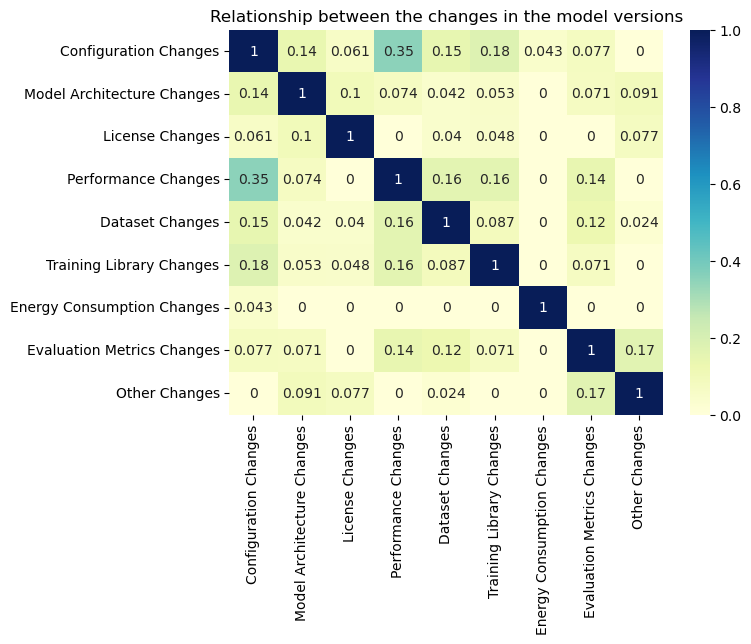

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score

df = check

# Calculate Jaccard similarity coefficient
jaccard_matrix = pd.DataFrame(index=df.columns, columns=df.columns)
for i in df.columns:
    for j in df.columns:
        jaccard_matrix.loc[i, j] = jaccard_score(df[i], df[j])

# Create a heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(jaccard_matrix.astype(float), annot=True, cmap="YlGnBu")
plt.title("Relationship between the changes in the model versions")
plt.show()


In [45]:
combined2 = pd.concat([df_majorc, df_majorr, df_minorc, df_minorr], axis = 0)
combined

,Owner,main_model_name,to_compare,Configuration Changes,Model Architecture Changes,License Changes,Performance Changes,Dataset Changes,Training Library Changes,Energy Consumption Changes,Evaluation Metrics Changes,Other Changes
0,Ahmed007,Ahmed007/Copilot_for_poors_v2,Ahmed007/Copilot_for_poors,1,0,0,0,0,0,0,0,0
0,Ahmed007,Ahmed007/Copilot_for_poors_v2,Ahmed007/Copilot_for_poors,0,0,0,1,0,0,0,0,0
1,albert,albert/albert-xlarge-v1,albert/albert-xlarge-v2,0,0,0,1,0,0,0,0,0
2,alpcansoydas,alpcansoydas/bert-base-arabic-emotion-analysis-v2,alpcansoydas/bert-base-arabic-emotion-analysis,0,0,0,1,0,0,0,0,0
2,alpcansoydas,alpcansoydas/bert-base-arabic-emotion-analysis-v2,alpcansoydas/bert-base-arabic-emotion-analysis,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
37,Undi95,Undi95/Mistral-11B-Airoboros-v0.1,Undi95/Mistral-11B-Airoboros-RP-v1,0,0,1,0,0,0,0,0,0
37,Undi95,Undi95/Mistral-11B-Airoboros-v0.1,Undi95/Mistral-11B-Airoboros-RP-v1,0,0,0,0,0,0,0,0,0
38,vaicai,vaicai/kaifa-support-chat-v7.3,vaicai/kaifa-support-chat-v7.2,0,0,0,0,0,0,0,0,0
39,wolfram,wolfram/miquliz-120b-v2.0,wolfram/miquliz-120b-v2.0-2.4bpw-h6-exl2,0,0,1,0,0,0,0,0,0


In [46]:
check.to_csv("crosscheck.csv", index=False)

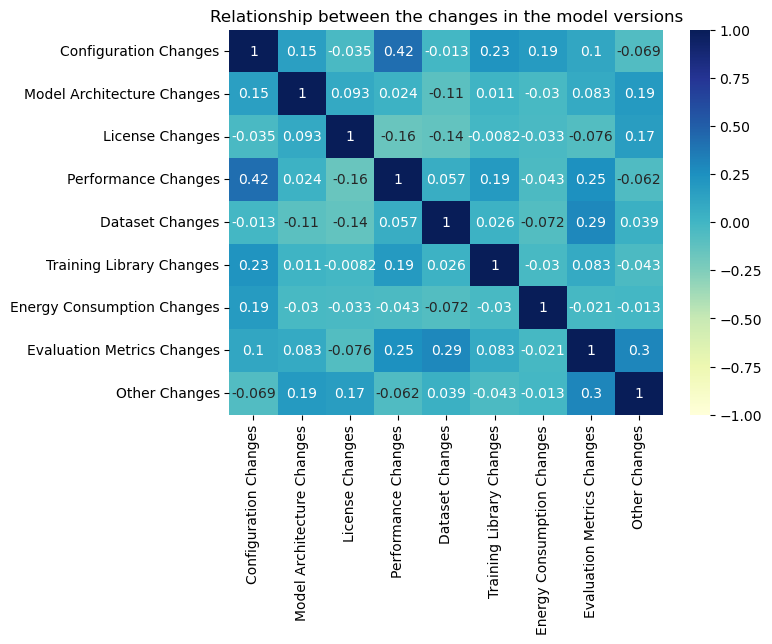

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fill NaN values with 0
check.fillna(0, inplace=True)

# Clip values to the range [0, 1]
check = check.clip(lower=0, upper=1)

# Calculate Pearson correlation matrix
phi_matrix = check.corr(method='pearson')

# Create a heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(phi_matrix, annot=True, cmap='YlGnBu',vmin=-1, vmax=1)

plt.title("Relationship between the changes in the model versions")
plt.show()


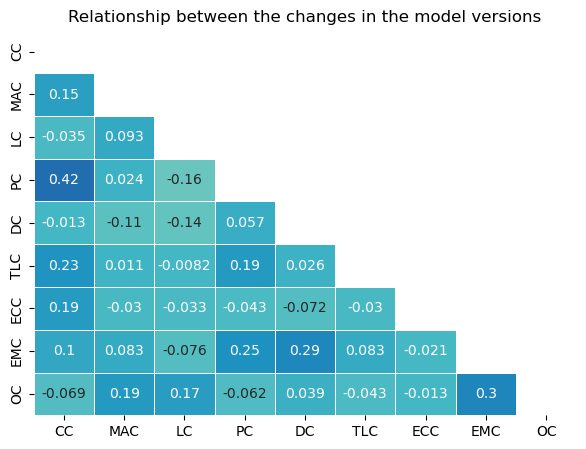

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

check.rename(columns={
    'Configuration Changes': 'CC',
    'Model Architecture Changes': 'MAC',
    'License Changes': 'LC',
    'Performance Changes': 'PC',
    'Dataset Changes': 'DC',
    'Training Library Changes': 'TLC',
    'Energy Consumption Changes': 'ECC',
    'Evaluation Metrics Changes': 'EMC',
    'Other Changes': 'OC'
}, inplace=True)


phi_matrix = check.corr(method='pearson')

# Replace NaN values with zeros for visualization purposes
phi_matrix.fillna(0, inplace=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(phi_matrix, dtype=bool))

# Create a heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(phi_matrix, annot=True, mask=mask, cmap='YlGnBu', vmin=-1, vmax=1, cbar=False, linewidths=.5)

# Annotate zero correlation cells with 'x'
for i in range(len(phi_matrix)):
    for j in range(len(phi_matrix)):
        if not mask[i, j] and phi_matrix.iloc[i, j] == 0:
            plt.text(j + 0.5, i + 0.5, 
                     horizontalalignment='center', 
                     verticalalignment='center', 
                     color='red')

plt.title("Relationship between the changes in the model versions ()")
plt.show()

In [50]:
"""import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming comb_group is your DataFrame
# Select the relevant columns
check = comb_group[['Config', 'Model_Arch', 'License', 'Performance', 'Dataset', 'Library', 'Energy', 'Per_metric', 'Others']]

# Fill NaN values with 0
check.fillna(0, inplace=True)

# Clip values to the range [0, 1]
check = check.clip(lower=0, upper=1)

# Calculate Pearson correlation matrix
phi_matrix = check.corr(method='pearson')

# Replace NaN values with zeros for visualization purposes
phi_matrix.fillna(0, inplace=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(phi_matrix, dtype=bool))

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(phi_matrix, annot=True, mask=mask, cmap='YlGnBu', vmin=-1, vmax=1, cbar=True, linewidths=.5)

# Annotate zero correlation cells with 'x' and perfect correlations with '1'
for i in range(len(phi_matrix)):
    for j in range(len(phi_matrix)):
        if not mask[i, j]:
            if phi_matrix.iloc[i, j] == 0:
                plt.text(j + 0.5, i + 0.5, 'x', 
                         horizontalalignment='center', 
                         verticalalignment='center', 
                         color='red')
            elif phi_matrix.iloc[i, j] == 1:
                plt.text(j + 0.5, i + 0.5, '1', 
                         horizontalalignment='center', 
                         verticalalignment='center', 
                         color='green')

plt.title("Relationship between the changes in the model versions")
plt.show()
"""

'import pandas as pd\nimport seaborn as sns\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n# Assuming comb_group is your DataFrame\n# Select the relevant columns\ncheck = comb_group[[\'Config\', \'Model_Arch\', \'License\', \'Performance\', \'Dataset\', \'Library\', \'Energy\', \'Per_metric\', \'Others\']]\n\n# Fill NaN values with 0\ncheck.fillna(0, inplace=True)\n\n# Clip values to the range [0, 1]\ncheck = check.clip(lower=0, upper=1)\n\n# Calculate Pearson correlation matrix\nphi_matrix = check.corr(method=\'pearson\')\n\n# Replace NaN values with zeros for visualization purposes\nphi_matrix.fillna(0, inplace=True)\n\n# Generate a mask for the upper triangle\nmask = np.triu(np.ones_like(phi_matrix, dtype=bool))\n\n# Create a heatmap\nplt.figure(figsize=(10, 8))\nsns.heatmap(phi_matrix, annot=True, mask=mask, cmap=\'YlGnBu\', vmin=-1, vmax=1, cbar=True, linewidths=.5)\n\n# Annotate zero correlation cells with \'x\' and perfect correlations with \'1\'\nfor i in range(len(phi

In [ ]:
"""
please, change the columns to


check = comb_group[['Configuration Changes',
       'Model Architecture Changes', 'License Changes', 'Performance Changes',
       'Dataset Changes', 'Training Library Changes',
       'Energy Consumption Changes', 'Evaluation Metrics Changes',
       'Other Changes']]

Configuration Changes: CC
Model Architecture Changes : MAC
License Changes : LC
Performance Changes : PC
Dataset Changes : DC
Training Library Changes : TLC
Energy Consumption Changes : ECC
Evaluation Metrics Changes : EMC
'Other Changes : OC
"""

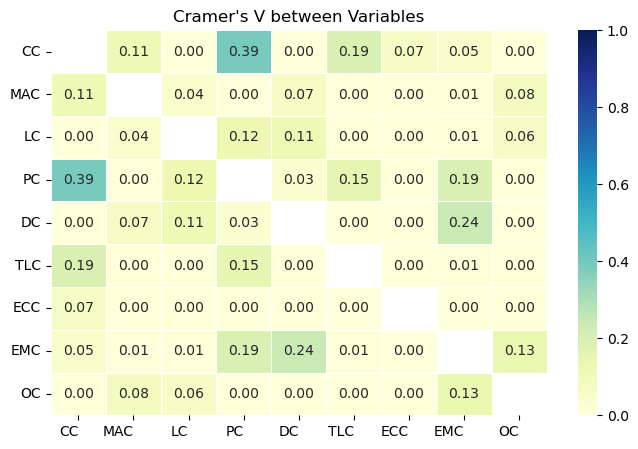

In [56]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `check` DataFrame is defined elsewhere
check.rename(columns={
  'Configuration Changes': 'CC',
  'Model Architecture Changes': 'MAC',
  'License Changes': 'LC',
  'Performance Changes': 'PC',
  'Dataset Changes': 'DC',
  'Training Library Changes': 'TLC',
  'Energy Consumption Changes': 'ECC',
  'Evaluation Metrics Changes': 'EMC',
  'Other Changes': 'OC'
}, inplace=True)

# Calculate Cramer's V for each pair of variables
cramers_v = {}
for col1 in check.columns:
    for col2 in check.columns:
        if col1 != col2:
            contingency_table = pd.crosstab(check[col1], check[col2])
            chi2, _, _, _ = chi2_contingency(contingency_table)
            n = contingency_table.sum().sum()
            min_dim = min(contingency_table.shape)
            cramers_v[(col1, col2)] = np.sqrt(chi2 / (n * (min_dim - 1)))

# Convert cramer's v dictionary to a DataFrame
cramers_v_df = pd.DataFrame(columns=check.columns, index=check.columns)
for (col1, col2), value in cramers_v.items():
    cramers_v_df.at[col1, col2] = value
    cramers_v_df.at[col2, col1] = value

# Convert dtype of DataFrame to float
cramers_v_df = cramers_v_df.astype(float)

# Create a heatmap with full variable names in labels (might require rotation)
plt.figure(figsize=(8, 5))  # Adjust figure size as needed
sns.heatmap(cramers_v_df, annot=True, cmap='YlGnBu', vmin=0, vmax=1, cbar=True, fmt=".2f", linewidths=0.5)  # Adjust parameters as before
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.title("Cramer's V between Variables")
plt.show()


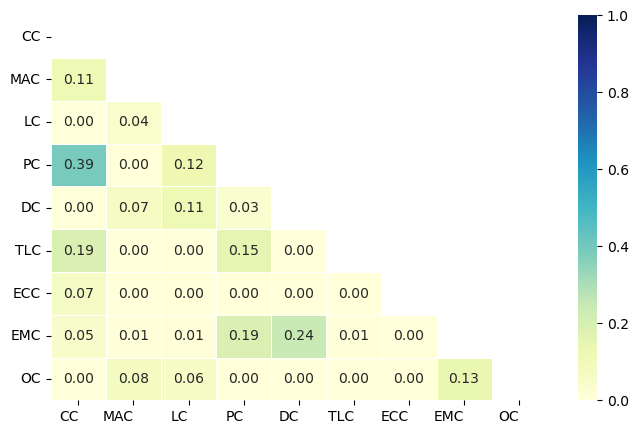

In [68]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `check` DataFrame is defined elsewhere
check.rename(columns={
  'Configuration Changes': 'CC',
  'Model Architecture Changes': 'MAC',
  'License Changes': 'LC',
  'Performance Changes': 'PC',
  'Dataset Changes': 'DC',
  'Training Library Changes': 'TLC',
  'Energy Consumption Changes': 'ECC',
  'Evaluation Metrics Changes': 'EMC',
  'Other Changes': 'OC'
}, inplace=True)

# Calculate Cramer's V for each pair of variables
cramers_v = {}
for col1 in check.columns:
    for col2 in check.columns:
        if col1 != col2:
            contingency_table = pd.crosstab(check[col1], check[col2])
            chi2, _, _, _ = chi2_contingency(contingency_table)
            n = contingency_table.sum().sum()
            min_dim = min(contingency_table.shape)
            cramers_v[(col1, col2)] = np.sqrt(chi2 / (n * (min_dim - 1)))

# Convert cramer's v dictionary to a DataFrame
cramers_v_df = pd.DataFrame(columns=check.columns, index=check.columns)
for (col1, col2), value in cramers_v.items():
    cramers_v_df.at[col1, col2] = value

# Convert dtype of DataFrame to float
cramers_v_df = cramers_v_df.astype(float)

# Set the upper triangle of the DataFrame to NaN
mask = np.triu(np.ones_like(cramers_v_df, dtype=bool))

# Create a heatmap with full variable names in labels (might require rotation)
plt.figure(figsize=(8, 5))  # Adjust figure size as needed
sns.heatmap(cramers_v_df, annot=True, cmap='YlGnBu', vmin=0, vmax=1, cbar=True, fmt=".2f", linewidths=0.5, mask=mask)  # Adjust parameters as before
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.savefig("correlation.pdf")
#plt.title("Relationship between the changes in the model versions (Cramers_V)")
plt.show()


In [66]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Assuming `check` DataFrame is defined elsewhere
check.rename(columns={
    'Configuration Changes': 'CC',
    'Model Architecture Changes': 'MAC',
    'License Changes': 'LC',
    'Performance Changes': 'PC',
    'Dataset Changes': 'DC',
    'Training Library Changes': 'TLC',
    'Energy Consumption Changes': 'ECC',
    'Evaluation Metrics Changes': 'EMC',
    'Other Changes': 'OC'
}, inplace=True)

# Calculate phi coefficient for each pair of variables
phi_coefficient = {}
for col1 in check.columns:
    for col2 in check.columns:
        if col1 != col2:
            contingency_table = pd.crosstab(check[col1], check[col2])
            chi2, _, _, _ = chi2_contingency(contingency_table)
            n = contingency_table.sum().sum()
            phi = np.sqrt(chi2 / n)
            phi_coefficient[(col1, col2)] = phi

# Convert phi coefficient dictionary to a DataFrame
phi_df = pd.DataFrame(columns=check.columns, index=check.columns)
for (col1, col2), value in phi_coefficient.items():
    phi_df.at[col1, col2] = value

# Fill diagonal with NaNs
np.fill_diagonal(phi_df.values, np.nan)

# Display the phi coefficient DataFrame
print("Phi Coefficient between Variables:")
phi_df


Phi Coefficient between Variables:


,CC,MAC,LC,PC,DC,TLC,ECC,EMC,OC
CC,NaN,0.110857,0.0,0.387305,0.0,0.188492,0.068878,0.049724,0.0
MAC,0.110857,NaN,0.042451,0.0,0.07233,0.0,0.0,0.007517,0.075655
LC,0.0,0.042451,NaN,0.119704,0.110245,0.0,0.0,0.005671,0.061898
PC,0.387305,0.0,0.119704,NaN,0.032539,0.149393,0.0,0.189607,0.0
DC,0.0,0.07233,0.110245,0.032539,NaN,0.0,0.0,0.244118,0.0
TLC,0.188492,0.0,0.0,0.149393,0.0,NaN,0.0,0.007517,0.0
ECC,0.068878,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
EMC,0.049724,0.007517,0.005671,0.189607,0.244118,0.007517,0.0,NaN,0.133858
OC,0.0,0.075655,0.061898,0.0,0.0,0.0,0.0,0.133858,NaN
